# AAAIM Evaluation Test - NCBI Gene

This notebook tests both single model evaluation and batch evaluation of multiple models.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from pathlib import Path
import logging

# Add the project root to the Python path
project_root = Path().absolute().parent
sys.path.insert(0, str(project_root))

# Import AAAIM functions
from core import annotate_model, curate_model
from utils.evaluation import (
    evaluate_single_model,
    evaluate_models_in_folder,
    print_evaluation_results,
    compare_results
)

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# LLM configuration
# llm_model = "meta-llama/llama-3.3-70b-instruct:free"  # or "gpt-4o-mini"
llm_model = "Llama-3.3-70B-Instruct"

# Evaluation parameters
max_entities_per_model = 10  # Limit entities per model for testing
num_models_to_test = 5  # Number of models to test in batch evaluation

# Entity and database configuration
entity_type = "gene"
database = "ncbigene"

output_dir = "./results/"  # Output directory for results

## Test 1: Single Model Evaluation

Evaluation of a single model with existing annotations.

In [2]:
test_model_file = "/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine/119_JNK-PATHWAY_source.sbml"
tax_id = 9606
# Check if test model exist

if os.path.exists(test_model_file):
    print(f"✓ Test model found: {test_model_file}")
else:
    print(f"✗ Test model not found: {test_model_file}")

✓ Test model found: /Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine/119_JNK-PATHWAY_source.sbml


In [3]:
# Test with a single model
recommendations_df, metrics = annotate_model(
    model_file=test_model_file,
    llm_model=llm_model,
    # max_entities=max_entities_per_model,
    entity_type=entity_type,
    database=database,
    tax_id=tax_id
)

INFO Starting annotation for model: /Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine/119_JNK-PATHWAY_source.sbml
INFO Using LLM model: Llama-3.3-70B-Instruct
INFO Using method: direct for database search
INFO Entity type: gene, Database: ncbigene
INFO Using organism-specific search for tax_id: 9606
INFO >>>Step 1: Getting species from model...<<<
INFO Found 19 species in model
INFO Found 5 entities with existing annotations
INFO Annotate all 19 entities
INFO >>>Step 2: Extracting model context...<<<
INFO Extracted context for model: model_id
INFO >>>Step 3: Querying LLM (Llama-3.3-70B-Instruct)...<<<
INFO HTTP Request: POST https://api.llama.com/compat/v1/chat/completions "HTTP/1.1 200 OK"
INFO LLM response received in 4.43s
INFO Parsed synonyms for 19 entities
INFO >>>Step 4: Searching ncbigene database...<<<
INFO Database search completed in 0.20s
INFO >>>Step 5: Generating recommendation table...<<<
INFO Annotation completed in 4.72s
INFO Generated 37 recommendations


In [4]:
recommendations_df

,file,type,id,display_name,annotation,annotation_label,match_score,existing,update_annotation
0,119_JNK-PATHWAY_source.sbml,gene,csa1,JNK_complex_cell,NCBIGENE:5599,MAPK8,0.666667,0,add
1,119_JNK-PATHWAY_source.sbml,gene,csa1,JNK_complex_cell,NCBIGENE:5601,MAPK9,0.333333,0,ignore
2,119_JNK-PATHWAY_source.sbml,gene,csa2,MLK1/2/3_complex,NCBIGENE:4296,MAP3K11,0.666667,0,add
3,119_JNK-PATHWAY_source.sbml,gene,csa2,MLK1/2/3_complex,NCBIGENE:4294,MAP3K10,0.333333,0,ignore
4,119_JNK-PATHWAY_source.sbml,gene,csa4,AP-1_complex,NCBIGENE:3725,JUN,0.666667,0,add
5,119_JNK-PATHWAY_source.sbml,gene,csa4,AP-1_complex,NCBIGENE:2353,FOS,0.333333,0,ignore
6,119_JNK-PATHWAY_source.sbml,gene,csa5,SARS-CoV-1 proteins_complex,NCBIGENE:5609,MAP2K7,0.666667,0,add
7,119_JNK-PATHWAY_source.sbml,gene,csa5,SARS-CoV-1 proteins_complex,NCBIGENE:6416,MAP2K4,0.333333,0,ignore
8,119_JNK-PATHWAY_source.sbml,gene,csa3,MEKK1/4_complex,NCBIGENE:4214,MAP3K1,0.666667,0,add
9,119_JNK-PATHWAY_source.sbml,gene,csa3,MEKK1/4_complex,NCBIGENE:4216,MAP3K4,0.333333,0,ignore


In [10]:
metrics

{'total_entities': 137,
 'entities_with_predictions': 136,
 'annotation_rate': 0.9927007299270073,
 'total_predictions': 138,
 'matches': 136,
 'accuracy': 1.0,
 'total_time': 24.440207958221436,
 'llm_time': 23.288011074066162,
 'search_time': 0.17545008659362793}

In [5]:
# Test using utils evaluation function
result_df = evaluate_single_model(
    model_file=test_model_file,
    tax_id=tax_id,
    llm_model=llm_model,
    # max_entities=max_entities_per_model,
    entity_type=entity_type,
    database=database,
    save_llm_results=True,
    output_dir=output_dir
)

INFO Evaluating model: 119_JNK-PATHWAY_source.sbml
INFO Using organism-specific search for tax_id: 9606
INFO Evaluating 5 entities in 119_JNK-PATHWAY_source.sbml
INFO HTTP Request: POST https://api.llama.com/compat/v1/chat/completions "HTTP/1.1 200 OK"
LLM results saved to: results/Llama-3.3-70B-instruct-Meta/gene/119_JNK-PATHWAY_source.txt


In [6]:
result_df

,model,species_id,display_name,synonyms_LLM,reason,exist_annotation_id,exist_annotation_name,predictions,predictions_names,match_score,recall_formula,precision_formula,recall_exact,precision_exact,accuracy,total_time,llm_time,query_time,tax_id,tax_name
0,119_JNK-PATHWAY_source.sbml,sa4,MAP2K4,"[MAP2K4, MKK4, JNKK1]",The annotations are based on the display names...,[6416],MAP2K4,[6416],[MAP2K4],[1.0],0,0,1.0,1.000000,1,2.432946,2.385862,0.047084,9606,None
1,119_JNK-PATHWAY_source.sbml,sa5,MAP2K7,"[MAP2K7, MKK7, MEK7]",The annotations are based on the display names...,[5609],MAP2K7,[5609],[MAP2K7],[0.6666666666666666],0,0,1.0,1.000000,1,2.432946,2.385862,0.047084,9606,None
2,119_JNK-PATHWAY_source.sbml,sa12,BCL2,"[BCL2, BCL2L1, BCL2L2]",The annotations are based on the display names...,[596],BCL2,"[596, 598, 599]","[BCL2, BCL2L1, BCL2L2]","[0.3333333333333333, 0.3333333333333333, 0.333...",0,0,1.0,0.333333,1,2.432946,2.385862,0.047084,9606,None
3,119_JNK-PATHWAY_source.sbml,sa33,ATF2,"[ATF2, CREBP1, TB14]",The annotations are based on the display names...,[1386],ATF2,"[1386, 2668]","[ATF2, GDNF]","[0.3333333333333333, 0.3333333333333333]",0,0,1.0,0.500000,1,2.432946,2.385862,0.047084,9606,None
4,119_JNK-PATHWAY_source.sbml,sa34,TP53,"[TP53, P53, TUMOR SUPPRESSOR P53]",The annotations are based on the display names...,[7157],TP53,[7157],[TP53],[0.6666666666666666],0,0,1.0,1.000000,1,2.432946,2.385862,0.047084,9606,None


## Test 2: Batch Model Evaluation

Test the evaluation of multiple models in a directory.

In [3]:
model_dir = '/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine/'

# Check if model directory exists
if os.path.exists(model_dir):
    model_files = [f for f in os.listdir(model_dir) if f.endswith('.sbml')]
    print(f"✓ Model directory found: {model_dir}")
    print(f"  - Found {len(model_files)} SBML files")
    # print(f"  - Will test first {min(num_models_to_test, len(model_files))} models")

✓ Model directory found: /Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine/
  - Found 190 SBML files


In [4]:
# Run batch evaluation 
batch_results_df = evaluate_models_in_folder(
    model_dir=model_dir,
    # num_models=min(num_models_to_test, len(model_files)),
    llm_model=llm_model,
    # max_entities=max_entities_per_model,
    entity_type=entity_type,
    database=database,
    save_llm_results=True,
    output_dir=output_dir,
    output_file="biodivine_ncbigene_direct_llama_9606.csv",
    start_at=1,
    tax_id = 9606
)

Evaluating 1/190: 001_SIGNALING-IN-MACROPHAGE-ACTIVATION_source.sbml
WARNING Skipping 001_SIGNALING-IN-MACROPHAGE-ACTIVATION_source.sbml - no results generated
Evaluating 2/190: 002_SIGNAL-TRANSDUCTION-IN-FIBROBLASTS_source.sbml
WARNING Skipping 002_SIGNAL-TRANSDUCTION-IN-FIBROBLASTS_source.sbml - no results generated
Evaluating 3/190: 003_MAMMALIAN-CELL-CYCLE_source.sbml
WARNING Skipping 003_MAMMALIAN-CELL-CYCLE_source.sbml - no results generated
Evaluating 4/190: 004_ERBB-RECEPTOR-SIGNALING_source.sbml
WARNING Skipping 004_ERBB-RECEPTOR-SIGNALING_source.sbml - no results generated
Evaluating 5/190: 005_FA-BRCA-PATHWAY_source.sbml
WARNING Skipping 005_FA-BRCA-PATHWAY_source.sbml - no results generated
Evaluating 6/190: 006_HGF-SIGNALING-IN-KERATINOCYTES_source.sbml
WARNING Skipping 006_HGF-SIGNALING-IN-KERATINOCYTES_source.sbml - no results generated
Evaluating 7/190: 007_CORTICAL-AREA-DEVELOPMENT_source.sbml
WARNING Skipping 007_CORTICAL-AREA-DEVELOPMENT_source.sbml - no results gene

In [4]:
batch_results_df

,model,species_id,display_name,synonyms_LLM,reason,exist_annotation_id,exist_annotation_name,predictions,predictions_names,match_score,recall_formula,precision_formula,recall_exact,precision_exact,accuracy,total_time,llm_time,query_time,tax_id,tax_name
0,111_APOPTOSIS_source.sbml,csa11,BCL2/MCL1/BCL2L1_complex,"[BCL2, MCL1, BCL2L1]",The given model appears to be related to apopt...,"[598, 4170, 596]","BCL2L1, MCL1, BCL2","[596, 4170, 598]","[BCL2, MCL1, BCL2L1]","[0.3333333333333333, 0.3333333333333333, 0.333...",0,0,1.0,1.000000,1,9.986166,9.724803,0.261363,"[9606, 227984]",None
1,111_APOPTOSIS_source.sbml,csa2,FAS/FASL_complex,"[FAS, FASLG, TNFRSF6]",The given model appears to be related to apopt...,"[355, 356]","FAS, FASLG","[355, 2194, 356]","[FAS, FASN, FASLG]","[0.6666666666666666, 0.3333333333333333, 0.333...",0,0,1.0,0.666667,1,9.986166,9.724803,0.261363,"[9606, 227984]",None
2,111_APOPTOSIS_source.sbml,csa1,TNF/TNFRSF1A_complex,"[TNF, TNFRSF1A, TNFSF2]",The given model appears to be related to apopt...,"[7124, 7132]","TNF, TNFRSF1A","[7124, 7132]","[TNF, TNFRSF1A]","[0.6666666666666666, 0.3333333333333333]",0,0,1.0,1.000000,1,9.986166,9.724803,0.261363,"[9606, 227984]",None
3,111_APOPTOSIS_source.sbml,csa3,BAD/BBC3/BCL2L11_complex,"[BAD, BBC3, BCL2L11]",The given model appears to be related to apopt...,"[27113, 10018, 572]","BBC3, BCL2L11, BAD","[572, 27113, 10018]","[BAD, BBC3, BCL2L11]","[0.3333333333333333, 0.3333333333333333, 0.333...",0,0,1.0,1.000000,1,9.986166,9.724803,0.261363,"[9606, 227984]",None
4,111_APOPTOSIS_source.sbml,csa6,TRADD/FADD_complex,"[TRADD, FADD, TRAF2]",The given model appears to be related to apopt...,"[8717, 8772]","TRADD, FADD","[8717, 8772, 7186, 10010]","[TRADD, FADD, TRAF2, TANK]","[0.3333333333333333, 0.3333333333333333, 0.333...",0,0,1.0,0.500000,1,9.986166,9.724803,0.261363,"[9606, 227984]",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,219_WNT-PI3K-AKT-PATHWAY_source.sbml,sa11180,EIF2A_phosphorylated,"[EIF2A, EIF2AK3, PERK]",,[83939],EIF2A,"[1965, 83939, 9451]","[EIF2S1, EIF2A, EIF2AK3]","[0.3333333333333333, 0.3333333333333333, 0.666...",0,0,1.0,0.333333,1,27.625591,27.304973,0.320618,"[9606, 227984]",None
400,219_WNT-PI3K-AKT-PATHWAY_source.sbml,sa11179,LRRK2_neuron,"[LRRK2, PARK2, PINK1]",,[120892],LRRK2,"[120892, 5071, 65018]","[LRRK2, PRKN, PINK1]","[0.3333333333333333, 0.3333333333333333, 0.333...",0,0,1.0,0.333333,1,27.625591,27.304973,0.320618,"[9606, 227984]",None
401,219_WNT-PI3K-AKT-PATHWAY_source.sbml,sa11376,EIF2AK3,"[EIF2AK3, PERK, IRE1A]",,[9451],EIF2AK3,"[9451, 2081]","[EIF2AK3, ERN1]","[0.6666666666666666, 0.3333333333333333]",0,0,1.0,0.500000,1,27.625591,27.304973,0.320618,"[9606, 227984]",None
402,219_WNT-PI3K-AKT-PATHWAY_source.sbml,sa9482,PHLPP1,"[PHLPP1, PHLPP2, AKT1]",,[23239],PHLPP1,"[23239, 23035, 207]","[PHLPP1, PHLPP2, AKT1]","[0.3333333333333333, 0.3333333333333333, 0.333...",0,0,1.0,0.333333,1,27.625591,27.304973,0.320618,"[9606, 227984]",None


In [3]:
print_evaluation_results(output_dir + "biodivine_ncbigene_direct_llama_9606.csv")

Number of models assessed: 15
Number of models with predictions: 15
Average accuracy (per model): 0.84
Ave. recall (formula): 0.00
Ave. precision (formula): 0.00
Ave. recall (exact): 0.81
Ave. precision (exact): 0.53
Average accuracy (per species): 0.90
Ave. recall (formula, per species): 0.00
Ave. precision (formula, per species): 0.00
Ave. recall (exact, per species): 0.88
Ave. precision (exact, per species): 0.49
Ave. total time (per model): 8.77
Ave. total time (per element, per model): 0.33
Ave. LLM time (per model): 8.60
Ave. LLM time (per element, per model): 0.32
Average number of predictions per species: 2.28


In [2]:
print_evaluation_results(output_dir + "biodivine_ncbigene_direct_llama_9606+227984.csv")

Number of models assessed: 15
Number of models with predictions: 15
Average accuracy (per model): 0.85
Ave. recall (formula): 0.00
Ave. precision (formula): 0.00
Ave. recall (exact): 0.82
Ave. precision (exact): 0.55
Average accuracy (per species): 0.92
Ave. recall (formula, per species): 0.00
Ave. precision (formula, per species): 0.00
Ave. recall (exact, per species): 0.90
Ave. precision (exact, per species): 0.49
Ave. total time (per model): 9.40
Ave. total time (per element, per model): 0.35
Ave. LLM time (per model): 9.22
Ave. LLM time (per element, per model): 0.34
Average number of predictions per species: 2.39


In [8]:
compare_results('/Users/luna/Desktop/CRBM/AMAS_proj/Results/biodivine_model_species_accuracy_all_underscore.csv','results/biodivine_ncbigene_direct_llama_9606+227984.csv')

COMPARISON OF RESULTS (filtered to common models/species)

RESULTS FOR: /Users/luna/Desktop/CRBM/AMAS_proj/Results/biodivine_model_species_accuracy_all_underscore.csv
Number of models assessed: 11
Number of models with predictions: 11
Number of species tested: 379
Average accuracy (per model): 0.73
Average number of predictions per species: 1.88

RESULTS FOR: results/biodivine_ncbigene_direct_llama_9606+227984.csv
Number of models assessed: 11
Number of models with predictions: 10
Number of species tested: 379
Average accuracy (per model): 0.86
Average recall (formula) (per model): 0.00
Average precision (formula) (per model): 0.00
Average recall (exact) (per model): 0.84
Average precision (exact) (per model): 0.47
Ave. total time (per model): 12.15
Ave. total time (per element, per model): 0.35
Ave. LLM time (per model): 11.92
Ave. LLM time (per element, per model): 0.34
Average number of predictions per species: 2.45

COMPARISON SUMMARY
                                               

In [7]:
compare_results('/Users/luna/Desktop/CRBM/AMAS_proj/Results/biodivine_model_species_accuracy_all_underscore.csv','results/biodivine_ncbigene_direct_llama_9606+227984.csv','results/biodivine_ncbigene_direct_llama_9606.csv')

COMPARISON OF RESULTS (filtered to common models/species)

RESULTS FOR: /Users/luna/Desktop/CRBM/AMAS_proj/Results/biodivine_model_species_accuracy_all_underscore.csv
Number of models assessed: 11
Number of models with predictions: 11
Number of species tested: 379
Average accuracy (per model): 0.73
Average number of predictions per species: 1.88

RESULTS FOR: results/biodivine_ncbigene_direct_llama_9606+227984.csv
Number of models assessed: 11
Number of models with predictions: 10
Number of species tested: 379
Average accuracy (per model): 0.86
Average recall (formula) (per model): 0.00
Average precision (formula) (per model): 0.00
Average recall (exact) (per model): 0.84
Average precision (exact) (per model): 0.47
Ave. total time (per model): 12.15
Ave. total time (per element, per model): 0.35
Ave. LLM time (per model): 11.92
Ave. LLM time (per element, per model): 0.34
Average number of predictions per species: 2.45

RESULTS FOR: results/biodivine_ncbigene_direct_llama_9606.csv
Numb

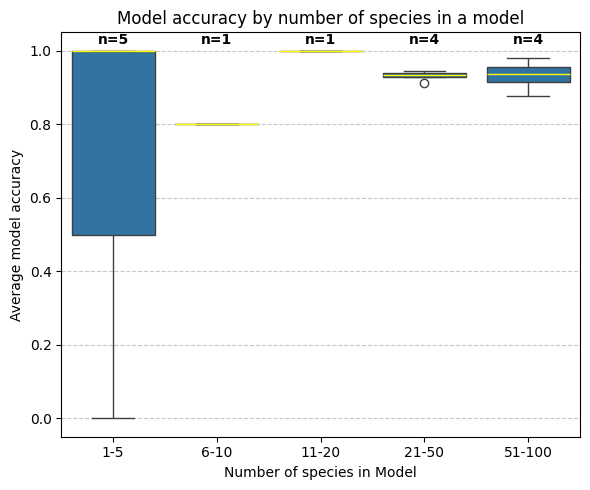

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
results_llama = pd.read_csv('results/biodivine_ncbigene_direct_llama.csv')
# Group models by number of species and calculate accuracy statistics
model_species_count = results_llama.groupby('model').size().reset_index(name='species_count')
model_accuracy = results_llama.groupby('model')['accuracy'].mean().reset_index()

# Merge the two dataframes
model_stats = pd.merge(model_species_count, model_accuracy, on='model')

# Create bins for species count to make the box plot more readable
bins = [0, 5, 10, 20, 50, 100]
labels = ['1-5', '6-10', '11-20', '21-50', '51-100']
model_stats['species_count_bin'] = pd.cut(model_stats['species_count'], bins=bins, labels=labels)

# Count number of models in each bin
bin_counts = model_stats['species_count_bin'].value_counts().reindex(labels, fill_value=0)

# Create the box plot
plt.figure(figsize=(6, 5))
ax = sns.boxplot(x='species_count_bin', y='accuracy', data=model_stats, medianprops={"color": "yellow", "linewidth": 1})

# Add counts above each box
for i, label in enumerate(labels):
    count = bin_counts[label]
    ax.text(i, 1.01, f'n={count}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.title('Model accuracy by number of species in a model')
plt.xlabel('Number of species in Model')
plt.ylabel('Average model accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig(os.path.join(output_dir, 'accuracy_by_species_count.png'), dpi=300, bbox_inches='tight')
plt.show()

## Functions test - qual model

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from pathlib import Path
import logging
import libsbml

# Add the project root to the Python path
project_root = Path().absolute().parent
sys.path.insert(0, str(project_root))

# Import AAAIM functions
from core import annotate_model, curate_model, model_info

In [2]:
model_file = "/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine/119_JNK-PATHWAY_source.sbml"
entity_type = "gene"
species_ids = model_info.get_all_species_ids(model_file, entity_type)
print(species_ids)
model_info.extract_model_info(model_file, species_ids, entity_type)

['csa1', 'csa2', 'csa4', 'csa5', 'csa3', 'csa12', 'sa4', 'sa5', 'sa12', 'sa16', 'sa17', 'sa18', 'sa33', 'sa34', 'sa36', 'sa75', 'sa76', 'sa77', 'sa78']


{'model_name': 'model_id',
 'model_type': <ModelType.SBML_QUAL: 'SBML-qual'>,
 'format_info': {'has_fbc': False,
  'has_qual': True,
  'num_species': 0,
  'num_reactions': 0,
  'num_qualitative_species': 19,
  'num_transitions': 13},
 'display_names': {'csa4': 'AP-1_complex',
  'sa36': 'TP53 signalling_phenotype',
  'csa2': 'MLK1/2/3_complex',
  'sa78': 'S',
  'csa3': 'MEKK1/4_complex',
  'sa17': 'Apoptosis_phenotype',
  'csa1': 'JNK_complex_cell',
  'sa75': '3b',
  'sa34': 'TP53_phosphorylated',
  'sa12': 'BCL2_phosphorylated',
  'sa16': 'Innate Immunity_phenotype',
  'sa33': 'ATF2_phosphorylated',
  'sa18': 'Autophagy_phenotype',
  'sa5': 'MAP2K7_phosphorylated',
  'sa4': 'MAP2K4_phosphorylated',
  'csa5': 'SARS-CoV-1 proteins_complex',
  'csa12': 'JNK_complex_cell',
  'sa76': '7a',
  'sa77': '3a'},
 'reactions': ['csa1 = ((sa4 | sa5 | sa76 | sa77) & csa12) | (csa12 & sa78)',
  'csa2 = csa5',
  'csa4 = csa1 | sa75',
  'csa3 = csa5',
  'sa4 = csa3 | csa5',
  'sa5 = csa2 | csa5',
  'sa

In [3]:
prompt = model_info.format_prompt(model_file, species_ids, entity_type)
print(prompt)

Now annotate these:
Gene to annotate: csa1, csa2, csa4, csa5, csa3, csa12, sa4, sa5, sa12, sa16, sa17, sa18, sa33, sa34, sa36, sa75, sa76, sa77, sa78
Model: "model_id" 
// Display Names:
{'csa4': 'AP-1_complex', 'sa36': 'TP53 signalling_phenotype', 'csa2': 'MLK1/2/3_complex', 'sa78': 'S', 'csa3': 'MEKK1/4_complex', 'sa17': 'Apoptosis_phenotype', 'csa1': 'JNK_complex_cell', 'sa75': '3b', 'sa34': 'TP53_phosphorylated', 'sa12': 'BCL2_phosphorylated', 'sa16': 'Innate Immunity_phenotype', 'sa33': 'ATF2_phosphorylated', 'sa18': 'Autophagy_phenotype', 'sa5': 'MAP2K7_phosphorylated', 'sa4': 'MAP2K4_phosphorylated', 'csa5': 'SARS-CoV-1 proteins_complex', 'csa12': 'JNK_complex_cell', 'sa76': '7a', 'sa77': '3a'}
// Boolean Transitions:
csa1 = ((sa4 | sa5 | sa76 | sa77) & csa12) | (csa12 & sa78)
csa2 = csa5
csa4 = csa1 | sa75
csa3 = csa5
sa4 = csa3 | csa5
sa5 = csa2 | csa5
sa12 = csa1
sa16 = csa4
sa17 = !sa12
sa18 = sa12
sa33 = csa1
sa34 = csa1
sa36 = sa34
// Notes:


Return up to 3 standardized n

In [4]:
model_file = "/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine/218_TCA-CYCLE_source.sbml"
reader = libsbml.SBMLReader()
document = reader.readSBML(model_file)
model = document.getModel().getPlugin("qual")
model.getPackageName()

'qual'

In [5]:
species_ids = model_info.get_all_species_ids(model_file, entity_type)
model_info.extract_model_info(model_file, species_ids, entity_type)

['csa1916', 'csa1897', 'csa1919', 'csa1898', 'csa1902', 'csa1899', 'csa1914', 'csa1949', 'csa1901', 'csa1921', 'csa1910', 'csa1895', 'csa1896', 'sa11864', 'sa12297', 'sa11889', 'sa11857', 'sa11975', 'sa11930', 'sa11896', 'sa11962', 'sa11966', 'sa11863', 'sa12216', 'sa11967', 'sa11923', 'sa11907', 'sa11979', 'sa11856', 'sa11976', 'sa11955', 'sa11883', 'sa11973', 'sa11932', 'sa11855', 'sa11946', 'sa11940', 'sa11935', 'sa11914', 'sa12001', 'sa11881', 'sa12294', 'sa11887', 'sa11945', 'sa11901', 'sa11950', 'sa11922', 'sa11980', 'sa11987', 'sa11852', 'sa11902', 'sa12024', 'sa11871', 'sa11944', 'sa11865', 'sa11867', 'sa12015', 'sa11908', 'sa11854', 'sa11964', 'sa11939', 'sa11938', 'sa12293', 'sa11929', 'sa12295', 'sa11972', 'sa11948', 'sa11927']


{'model_name': 'model_id',
 'model_type': <ModelType.SBML_QUAL: 'SBML-qual'>,
 'format_info': {'has_fbc': False,
  'has_qual': True,
  'num_species': 0,
  'num_reactions': 0,
  'num_qualitative_species': 68,
  'num_transitions': 34},
 'display_names': {'sa12024': 'pyruvate_simple_molecule_neuron',
  'csa1899': 'Succinyl-CoA_space_ligase_complex_mitochondrial_space_matrix',
  'csa1895': 'pyruvate_space_dehydrogenase_space_complex_complex_mitochondrial_space_matrix',
  'sa11939': 'oxaloacetate(2-)_simple_molecule',
  'csa1897': 'malate_space_dehydrogenase_space_2_complex',
  'sa11889': 'fumaric_space_acid_simple_molecule',
  'sa11962': 'GLUD1',
  'sa12294': 'GTP_simple_molecule',
  'sa11979': 'PC',
  'sa11901': 'ACSS1',
  'sa11987': 'ADHFE1',
  'csa1919': 'fumarate_space_hydratase_complex',
  'sa11927': 'Co2+_ion',
  'sa11863': 'GDP_simple_molecule',
  'sa11883': '(5-hydroxyindol-3-yl)acetaldehyde_simple_molecule',
  'sa11854': '(S)-malate(2-)_simple_molecule',
  'sa11935': 'succinyl-CoA

In [3]:
import os
from openai import OpenAI
client = OpenAI(api_key=os.getenv("LLAMA_API_KEY"),base_url="https://api.llama.com/compat/v1/")
response = client.chat.completions.create(
    model="Llama-3.3-70B-Instruct",
    messages=[
        {"role": "user", "content": "Which planet do humans live on?"}
    ],
    temperature=0.2,
    max_tokens=10000)
print(response.choices[0].message.content)

Humans live on the planet Earth.
